# A Linear Regression Problem Using Sklearn Gradient Descent


**Learning objectives:**
* Learn fundamental concepts of sklearn
* Use the linear regression gradient descent to predict profits
* Evaluate the accuracy of a model's prediction using the Root Mean Squared Error (RMSE)


**What is the problem ?**

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.


## 1 . Initial Setup
In the first step, we need to load the necessay libs: **_math_**, **_sklearn_**, **_pandas_** and **_matplotlib_**

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn import base
import math

Next step, we will load the dataset from local directory and show the first ten elements

In [2]:
ft = pd.read_csv("ex1data1.txt", sep=",", header=None)
ft[:10]

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


## 2. Examine the data
We will rename columns names to handle easily these features. The first column represents the **_population_** and the second column represents the **_profit_**

In [3]:
ft.columns = ["population", "profit"]

In [4]:
ft.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In general It is a good idea to know the data that being working to. The function **_describe_** from a dataframe describes a statistical summary of all features insided of this dataframe.

In [5]:
ft.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


As the set of relevante features in dataset is unidimensional, in this case the feature **_population_**, we can visualize the the data using the matplotlib making a scatter plot where the **x** axis is the population and the **y** axis is the **_profit_**.

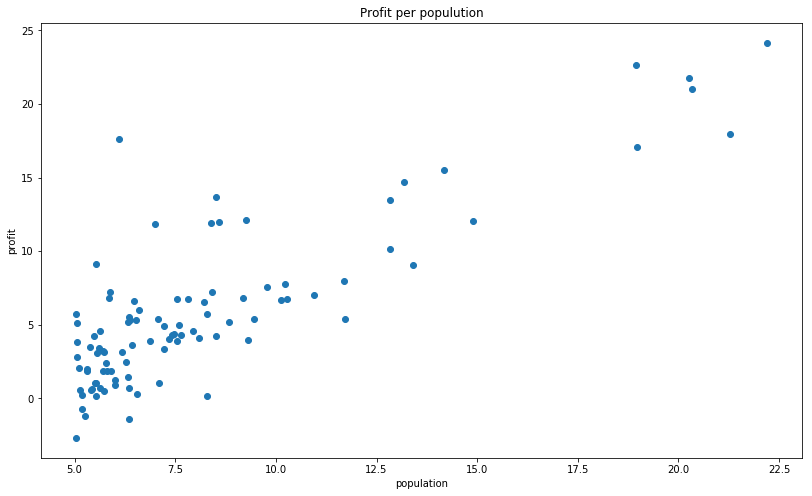

In [6]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.xlabel("population")
plt.ylabel("profit")
plt.title("Profit per populution")
plt.scatter(ft["population"], ft["profit"])

## 3. Configure and build the model

To use the gradient descent from sklearn is necessary configure the loss parameter with **squared_loss** and penalty with **_None_**.

In [7]:
model = SGDRegressor(loss="squared_loss", penalty=None)

Next, we should convert the pandas serie (column **population**) to a numpy array that is used to train a model in sklearn. So, we use the function **reshape** to do this work to us, this function gives a new shape to an array without changing its data.

In [8]:
X = ft["population"].values
X = X.reshape(-1, 1)
X[:20]

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708]])

We should define our target which is the **profit**

In [9]:
y = ft["profit"].values
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

And finally we will train our model (gradient descent) to learn the best coeficients of the linear model that fits to all data in dataset.

In [10]:
model.fit(X,y)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

To visualize the results and plot the line defined by the model, we'll create a list of points **x_plot** get a list of predictions values of profits and store it in **y_plot**.

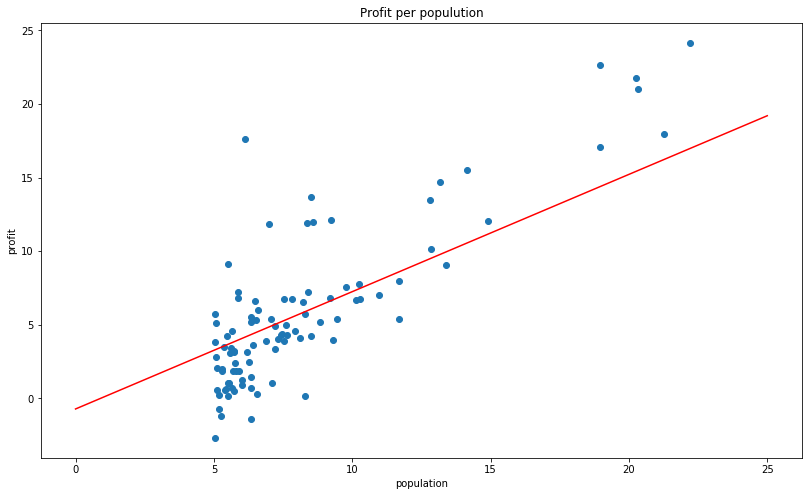

In [11]:
x_plot = list(range(0,26,1))
x_plot = np.array(x_plot).reshape(-1, 1)
y_plot = model.predict(x_plot)

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.xlabel("population")
plt.ylabel("profit")
plt.title("Profit per populution")
plt.scatter(ft["population"], ft["profit"])
plt.plot(x_plot, y_plot, color="red")
plt.show()

## 4. Evaluate the model

Is this a good model? 
How would you judge how large this error is?
Let's compare with metrics MSE, RMSE and the difference between the max and min profit from dataset.

In [12]:
predictions = model.predict(X)


mean_squared_error = metrics.mean_squared_error(predictions, y)
root_mean_squared_error = math.sqrt(mean_squared_error)
print "Mean Squared Error (on training data): %0.3f" % mean_squared_error
print "Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error
print "Difference between Max and Min: %0.3f" % (ft["profit"].max() - ft["profit"].min())

Mean Squared Error (on training data): 11.289
Root Mean Squared Error (on training data): 3.360
Difference between Max and Min: 26.828


For each period, we'll compute and graph training loss. This may help you judge when a model is converged, or if it needs more iterations.

Training model...
RMSE (on training data)
  period 00 : 3.43
  period 01 : 3.44
  period 02 : 3.43
  period 03 : 3.40
  period 04 : 3.41
  period 05 : 3.34
  period 06 : 3.65
  period 07 : 3.42
  period 08 : 3.35
  period 09 : 3.53


SGDRegressor(alpha=1e-05, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

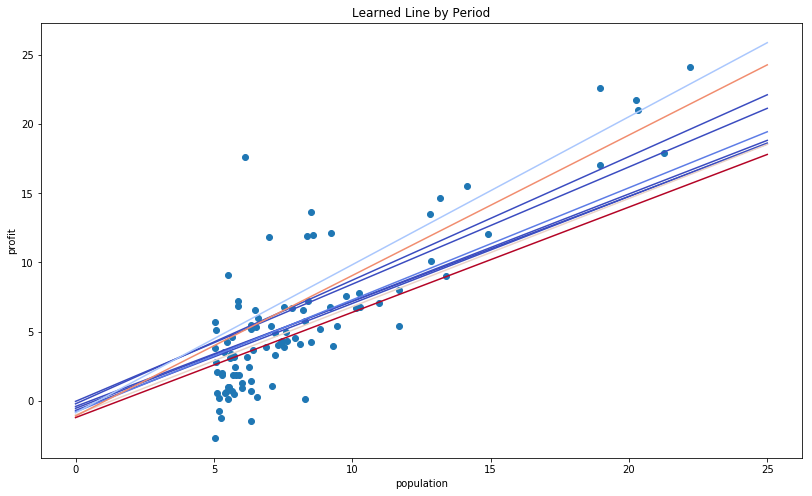

In [13]:
learn_rate = 0.00001
steps = 100
periods = 10
steps_per_periods = steps / periods
targets = y

model = base.clone(model)
model.max_iter = steps_per_periods
model.alpha = learn_rate

plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.title("Learned Line by Period")
plt.ylabel(ft.columns[1])
plt.xlabel(ft.columns[0])
plt.scatter(ft["population"], ft["profit"])
colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]
x_plot = range(0, 26, 1)
x_plot = np.array(x_plot).reshape(-1, 1)

print "Training model..."
print "RMSE (on training data)"
root_mean_squared_errors = []
for p in range(0, periods):
    model.partial_fit(X, y)
    predictions = model.predict(X)
    
    root_mean_squared_error = math.sqrt(metrics.mean_squared_error(predictions, targets))    
    root_mean_squared_errors.append(root_mean_squared_error)
    print "  period %02d : %0.2f" % (p, root_mean_squared_error)
    
    plt.plot(x_plot, model.predict(x_plot), color=colors[p])

model.fit(X,y)

Plot the RMSE vs Periods

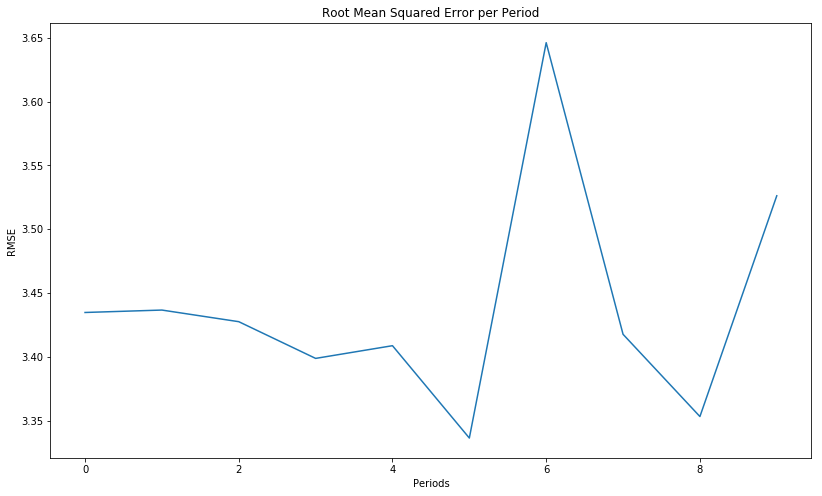

In [14]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.title("Root Mean Squared Error per Period")
plt.ylabel("RMSE")
plt.xlabel("Periods")
plt.plot(root_mean_squared_errors)